# <center>Heart Disease Classification<center/>

Table of Contents:
1. [Introduction](#1)
    - 1.1 [Context](#2)
    - 1.2 [Features Description](#3)
    - 1.3 [Task](#4)
2. [Data Preparation](#5)
    - 2.1 [Packages](#6)
    - 2.2 [Data Fetching](#7)
    - 2.3 [Understanding Data](#8)
3. [Exploratory Data Analysis](#9)
    - 3.1 [Univariate Analysis](#10)
    - 3.2 [Bivariate Analysis](#11)
4. [Data Preprocessing-1](#12)
    - 4.1 [Conclusions from EDA](#13)
    - 4.2 [Removing the outliers](#14)
    - 4.3 [Removing the skewness](#15)
5. [Data Preprocessing-2](#16)
    - 5.1 [Creating the spark session and context](#17)
    - 5.2 [Loading data into a Spark DataFrame](#18)
    - 5.3 [Converting data frame columns into feature vectors](#19)
    - 5.4 [Creating a test-train split of 75%-25% ](#20)
    - 5.5 [Standard Scaling](#21)
6. [Building and Training a Linear Regression Model](#22)
    - 6.1 [Create and Train model](#23)
    - 6.2 [Predict on new data](#24)
    - 6.3 [Model Evaluation](#25)


### 1. Introduction <a id=1></a>

#### 1.1 Context <a id=2></a>
This data set dates from 1988 and consists of four databases: Cleveland Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

#### 1.2 Feature Discription <a id=3></a>

`age` : age in years

`sex` : (1 = male; 0 = female)

`cp` :  chest pain type (4 values)

`trestbps` : resting blood pressure (in mm Hg on admission to the hospital)

`chol` : serum cholestoral in mg/dl

`fbs` : f(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

`restecg` : resting electrocardiographic results (values 0,1,2)

`thalach` : maximum heart rate achieved

`exang` : exercise induced angina (1 = yes; 0 = no)

`oldpeak`: ST depression induced by exercise relative to rest

`slope` : the slope of the peak exercise ST segment

`ca` : number of major vessels (0-3) colored by flourosopy

`thal` : 0 = normal; 1 = fixed defect; 2 = reversable defect

`target` : 1 or 0

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

#### 1.3 Task <a id=4></a>
To predict the onset of Heart Disease based on diagnostic measures.

### 2. Data Preparation <a id=5></a>

#### 2.1 Packages <a id=6></a>

This section is divided into two subsections:

##### 2.1.1 Installing  Required Package

This subsection installs the required packages for running the code. It uses the !pip3 install command to install pyspark version 3.1.2 and findspark. The exclamation mark (!) is used to run shell commands within Jupyter Notebook or similar environments.

In [1]:
!pip3 install pyspark==3.1.2
!pip install findspark
import findspark
findspark.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 9.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880756 sha256=ebe008c69a852691521c41a15eac2820822109e85e25427271a4c919edf9fed1
  Stored in directory: /root/.cache/pip/wheels/ef/70/50/7882e1bcb5693225f7cc86698f10953201b48b3f36317c2d18
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##### 2.1.2 Importing Packages

This subsection imports the necessary packages for the code. The imported packages are:

- pandas: A data manipulation library that provides data structures and functions for efficient data analysis.

- numpy: A library for numerical computations in Python.

- matplotlib.pyplot: A plotting library used for creating visualizations.

- pyspark: The main package for Apache Spark, a distributed computing framework.

- SparkContext and SparkConf: Classes for configuring and creating a Spark context.

- SparkSession: A class for creating a Spark session.

- plotly.express: A high-level data visualization library that provides an easy-to-use interface for creating interactive plots.

- seaborn: A statistical data visualization library based on Matplotlib.

- VectorAssembler: A feature transformation tool in Spark MLlib that assembles a given list of columns into a single feature vector.

- StandardScaler: A feature transformation tool in Spark MLlib that standardizes features by scaling them to have zero mean and unit standard deviation.

- LogisticRegression: A logistic regression algorithm implementation in Spark MLlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
import plotly.express as px
import seaborn as sns
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

#### 2.2 Data Fetching <a id=7></a>

This section loads the dataset using pd.read_csv() from the pandas library. It reads a CSV file located at '/content/heart.csv' and assigns the resulting DataFrame to the variable df.

In [4]:
# Load the dataset using pd.read_csv:
df = pd.read_csv('/content/heart.csv')

#### 2.3 Understanding Data <a id=8></a>

##### 2.3.1 The shape of the data

This section prints the shape of the dataset using the shape attribute of the DataFrame (df). It gives the number of rows and columns in the dataset.

In [5]:
# Print the shape of the dataset:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (1025, 14)


##### 2.3.2 Preview of Data-Frame

This section displays the first few rows of the DataFrame using the head() function. It provides a preview of the data to get an initial understanding of its structure and contents.

In [6]:
# Display the first few rows of the DataFrame:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##### 2.3.3 Checking the number of unique values in each column

In this section, the code calculates the number of unique values in each column of the DataFrame. It creates a dictionary where the column names are the keys, and the corresponding values are the counts of unique values in each column. Finally, it creates a DataFrame from the dictionary to display the unique value counts.

In [7]:
# Calculate the number of unique values in each column:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


##### 2.3.4 Separating into features and targets

This section separates the dataset into two parts: the feature columns (non-target columns) and the target column. It creates a list of feature columns by dropping the 'target' column from the DataFrame. The target column is assigned to the target_col variable. It then prints the feature columns and the target column.

In [8]:
# Separate the dataset into features and target columns:
non_target_cols = list(df.drop('target',axis=1).columns)
target_col = ['target']
print(f"The columns are : {non_target_cols}")
print(f"The target is   : {target_col}")

The columns are : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
The target is   : ['target']


##### 2.3.5 Summary statistics

This section calculates summary statistics for the non-target columns in the DataFrame using the describe() function. It provides statistical measures such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum for each non-target column.

In [9]:
# Calculate summary statistics for the non-target columns:
df[non_target_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


##### 2.3.6 Missing values

This section checks for missing values in the dataset using the isnull() function. It returns a DataFrame with the same shape as df, where each cell contains either True or False, indicating whether the corresponding value in df is missing or not. The sum() function is then applied to count the number of missing values in each column.

In [10]:
# Check for missing values in the dataset:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### 2.3.7 Outlier Detection

In this section, outliers in the dataset are detected. First, the code calculates the first quartile (q1), third quartile (q3), and interquartile range (IQR) for each column using the quantile() function. Then, it identifies outliers by comparing each value in df with the thresholds defined as q1-1.5*IQR (lower bound) and q3+1.5*IQR (upper bound). Any value outside these bounds is considered an outlier. The outliers are stored in a DataFrame called outliers

In [11]:
# Detect outliers in the dataset:
q1=df.quantile(0.25)

q3=df.quantile(0.75)

IQR=q3-q1

outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


cols_with_outliers = []

for col in outliers.columns:
    col_outliers = outliers[outliers[col].notnull()][col].tolist()
    if len(col_outliers) > 0:
        cols_with_outliers.append(col)

print("Columns with outliers:")
print(cols_with_outliers)

print("\nOutliers in each column:")
print(outliers.count())

Columns with outliers:
['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

Outliers in each column:
age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64


### 3. Exploratory Data Analysis <a id=9></a>

#### 3.1 Univariate Analysis <a id=10></a>

##### 3.1.1 Histogram

This section creates a grid of histograms to visualize the distribution of variables in the DataFrame. It uses sns.histplot to plot histograms with a kernel density estimate (KDE) line. The grid layout, titles, and other styling options are specified.

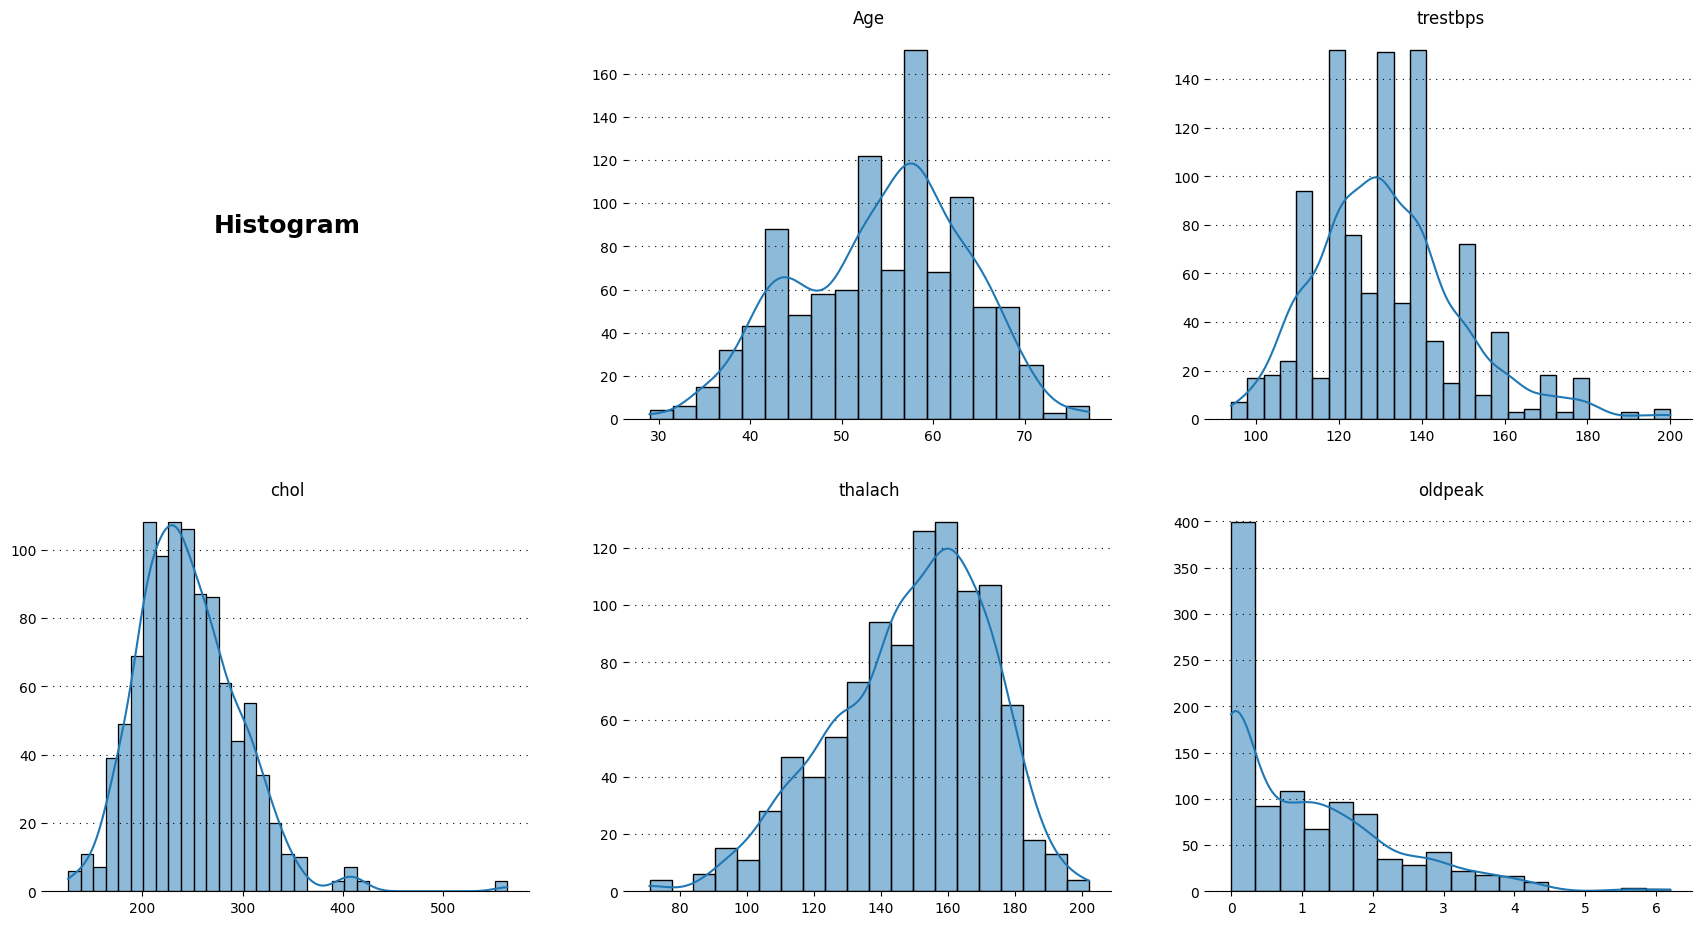

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=4.0)

titles = ['Histogram', 'Age', 'trestbps', 'chol', 'thalach', 'oldpeak']
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

axes[0, 0].set_axis_off()
axes[0, 0].text(0.5, 0.5, titles[0], horizontalalignment='center', verticalalignment='center',
                fontsize=18, fontweight='bold', color="#000000")

for i, ax in enumerate(axes.flat[1:]):
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    sns.histplot(ax=ax, x=df[columns[i]], kde=True)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(titles[i+1])

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()


##### 3.1.2 Bar Plot

This section creates a grid of count plots (bar plots) to visualize the frequency/count of categorical variables in the DataFrame. It uses sns.countplot to plot the count of each category in each variable. The grid layout, titles, and other styling options are specified.



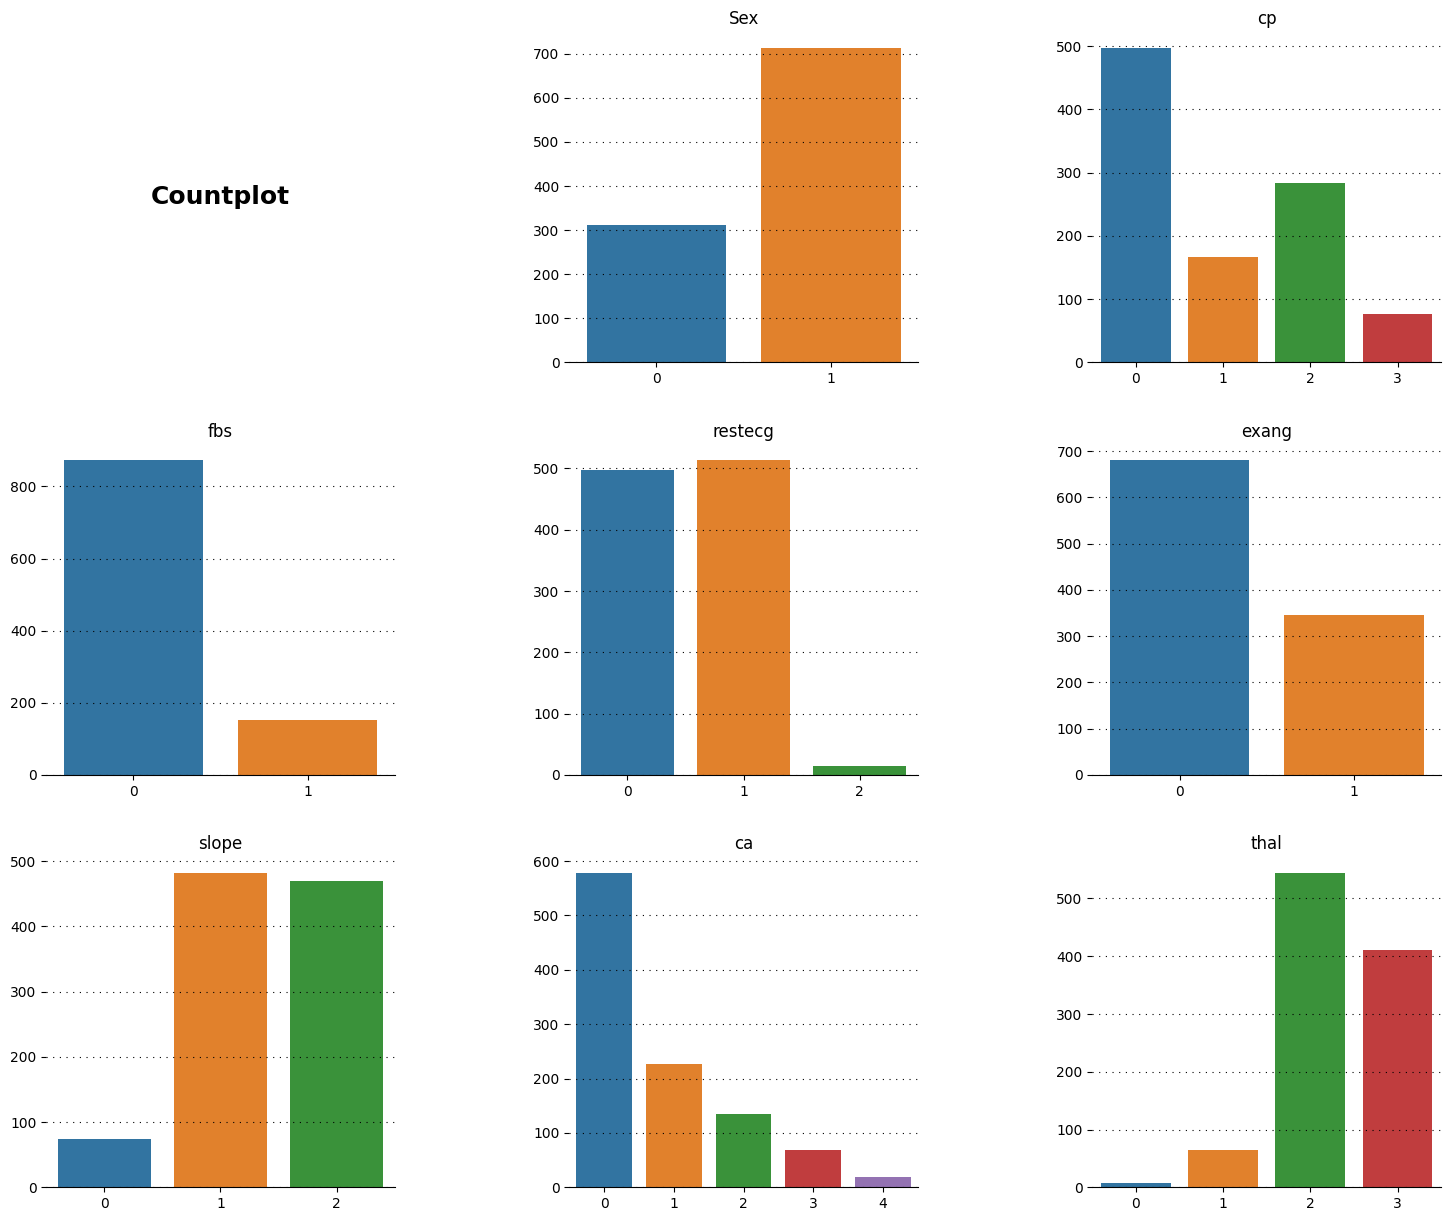

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.subplots_adjust(wspace=0.5, hspace=0.25)

titles = ['Countplot', 'Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

axes[0, 0].set_axis_off()
axes[0, 0].text(0.5, 0.5, titles[0], horizontalalignment='center', verticalalignment='center',
                fontsize=18, fontweight='bold', color="#000000")

for i, ax in enumerate(axes.flat[1:]):
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    sns.countplot(ax=ax, x=df[columns[i]])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(titles[i+1])

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()


##### 3.1.3 Analysis of target variable

This section creates a subplot to analyze the distribution of the target variable. It uses sns.countplot to plot the count of each class in the target variable. The subplot layout, titles, and other styling options are specified.

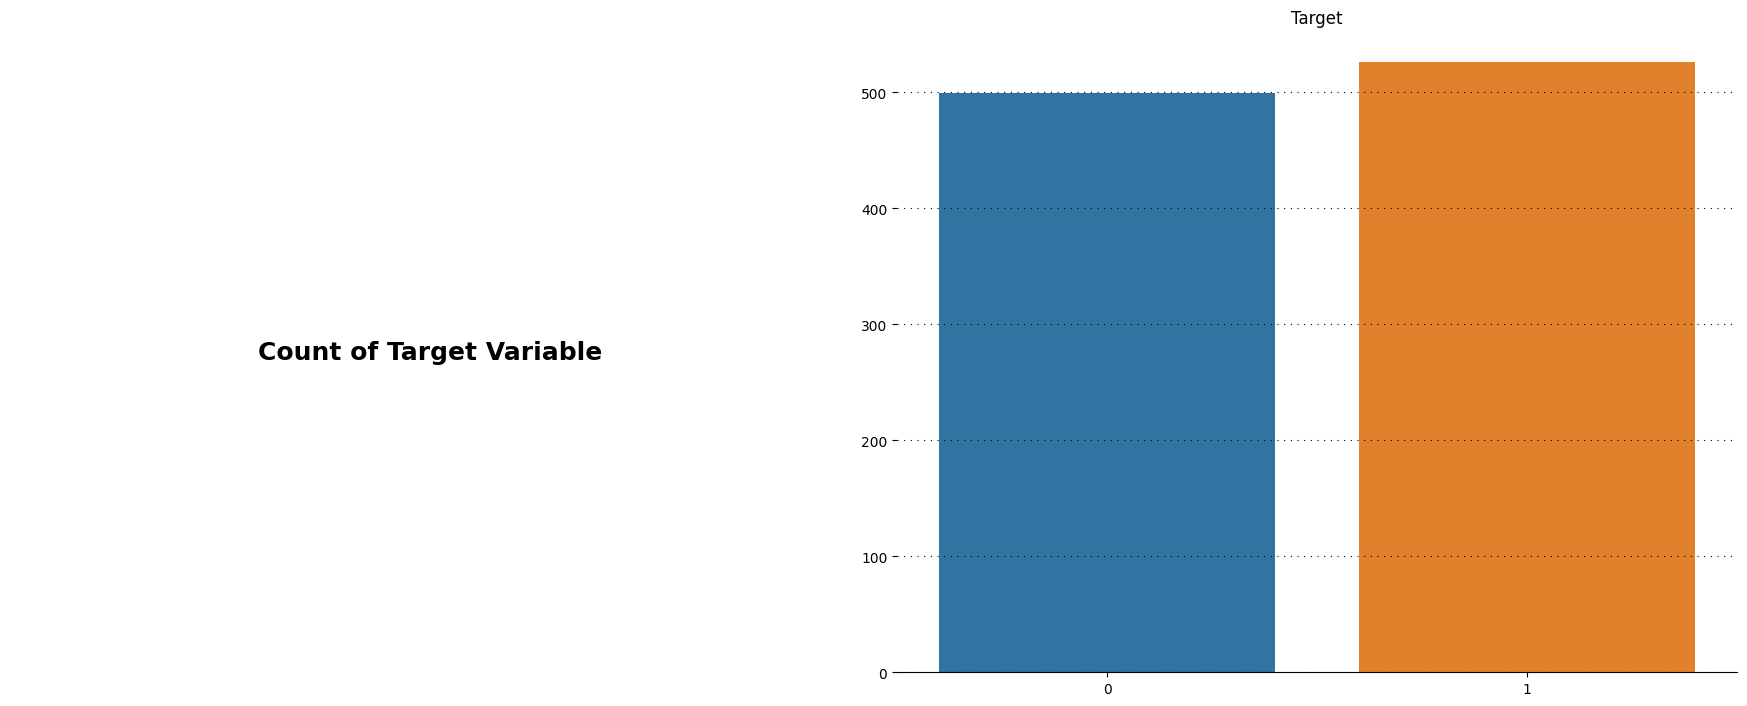

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.tight_layout(w_pad=0.3, h_pad=0.15)

titles = ['Count of Target Variable', 'Target']
columns = ['target']

axes[0].set_axis_off()
axes[0].text(0.5, 0.5, titles[0], horizontalalignment='center', verticalalignment='center',
             fontsize=18, fontweight='bold', color="#000000")

for i, ax in enumerate(axes.flat[1:]):
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    sns.countplot(ax=ax, x=df[columns[i]])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(titles[i+1])

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()

##### 3.1.4 Box plot

This section creates a grid of box plots to visualize the distribution and identify potential outliers in the numerical variables in the DataFrame. It uses sns.boxplot to plot the box plot for each variable. The grid layout, titles, and other styling options are specified.

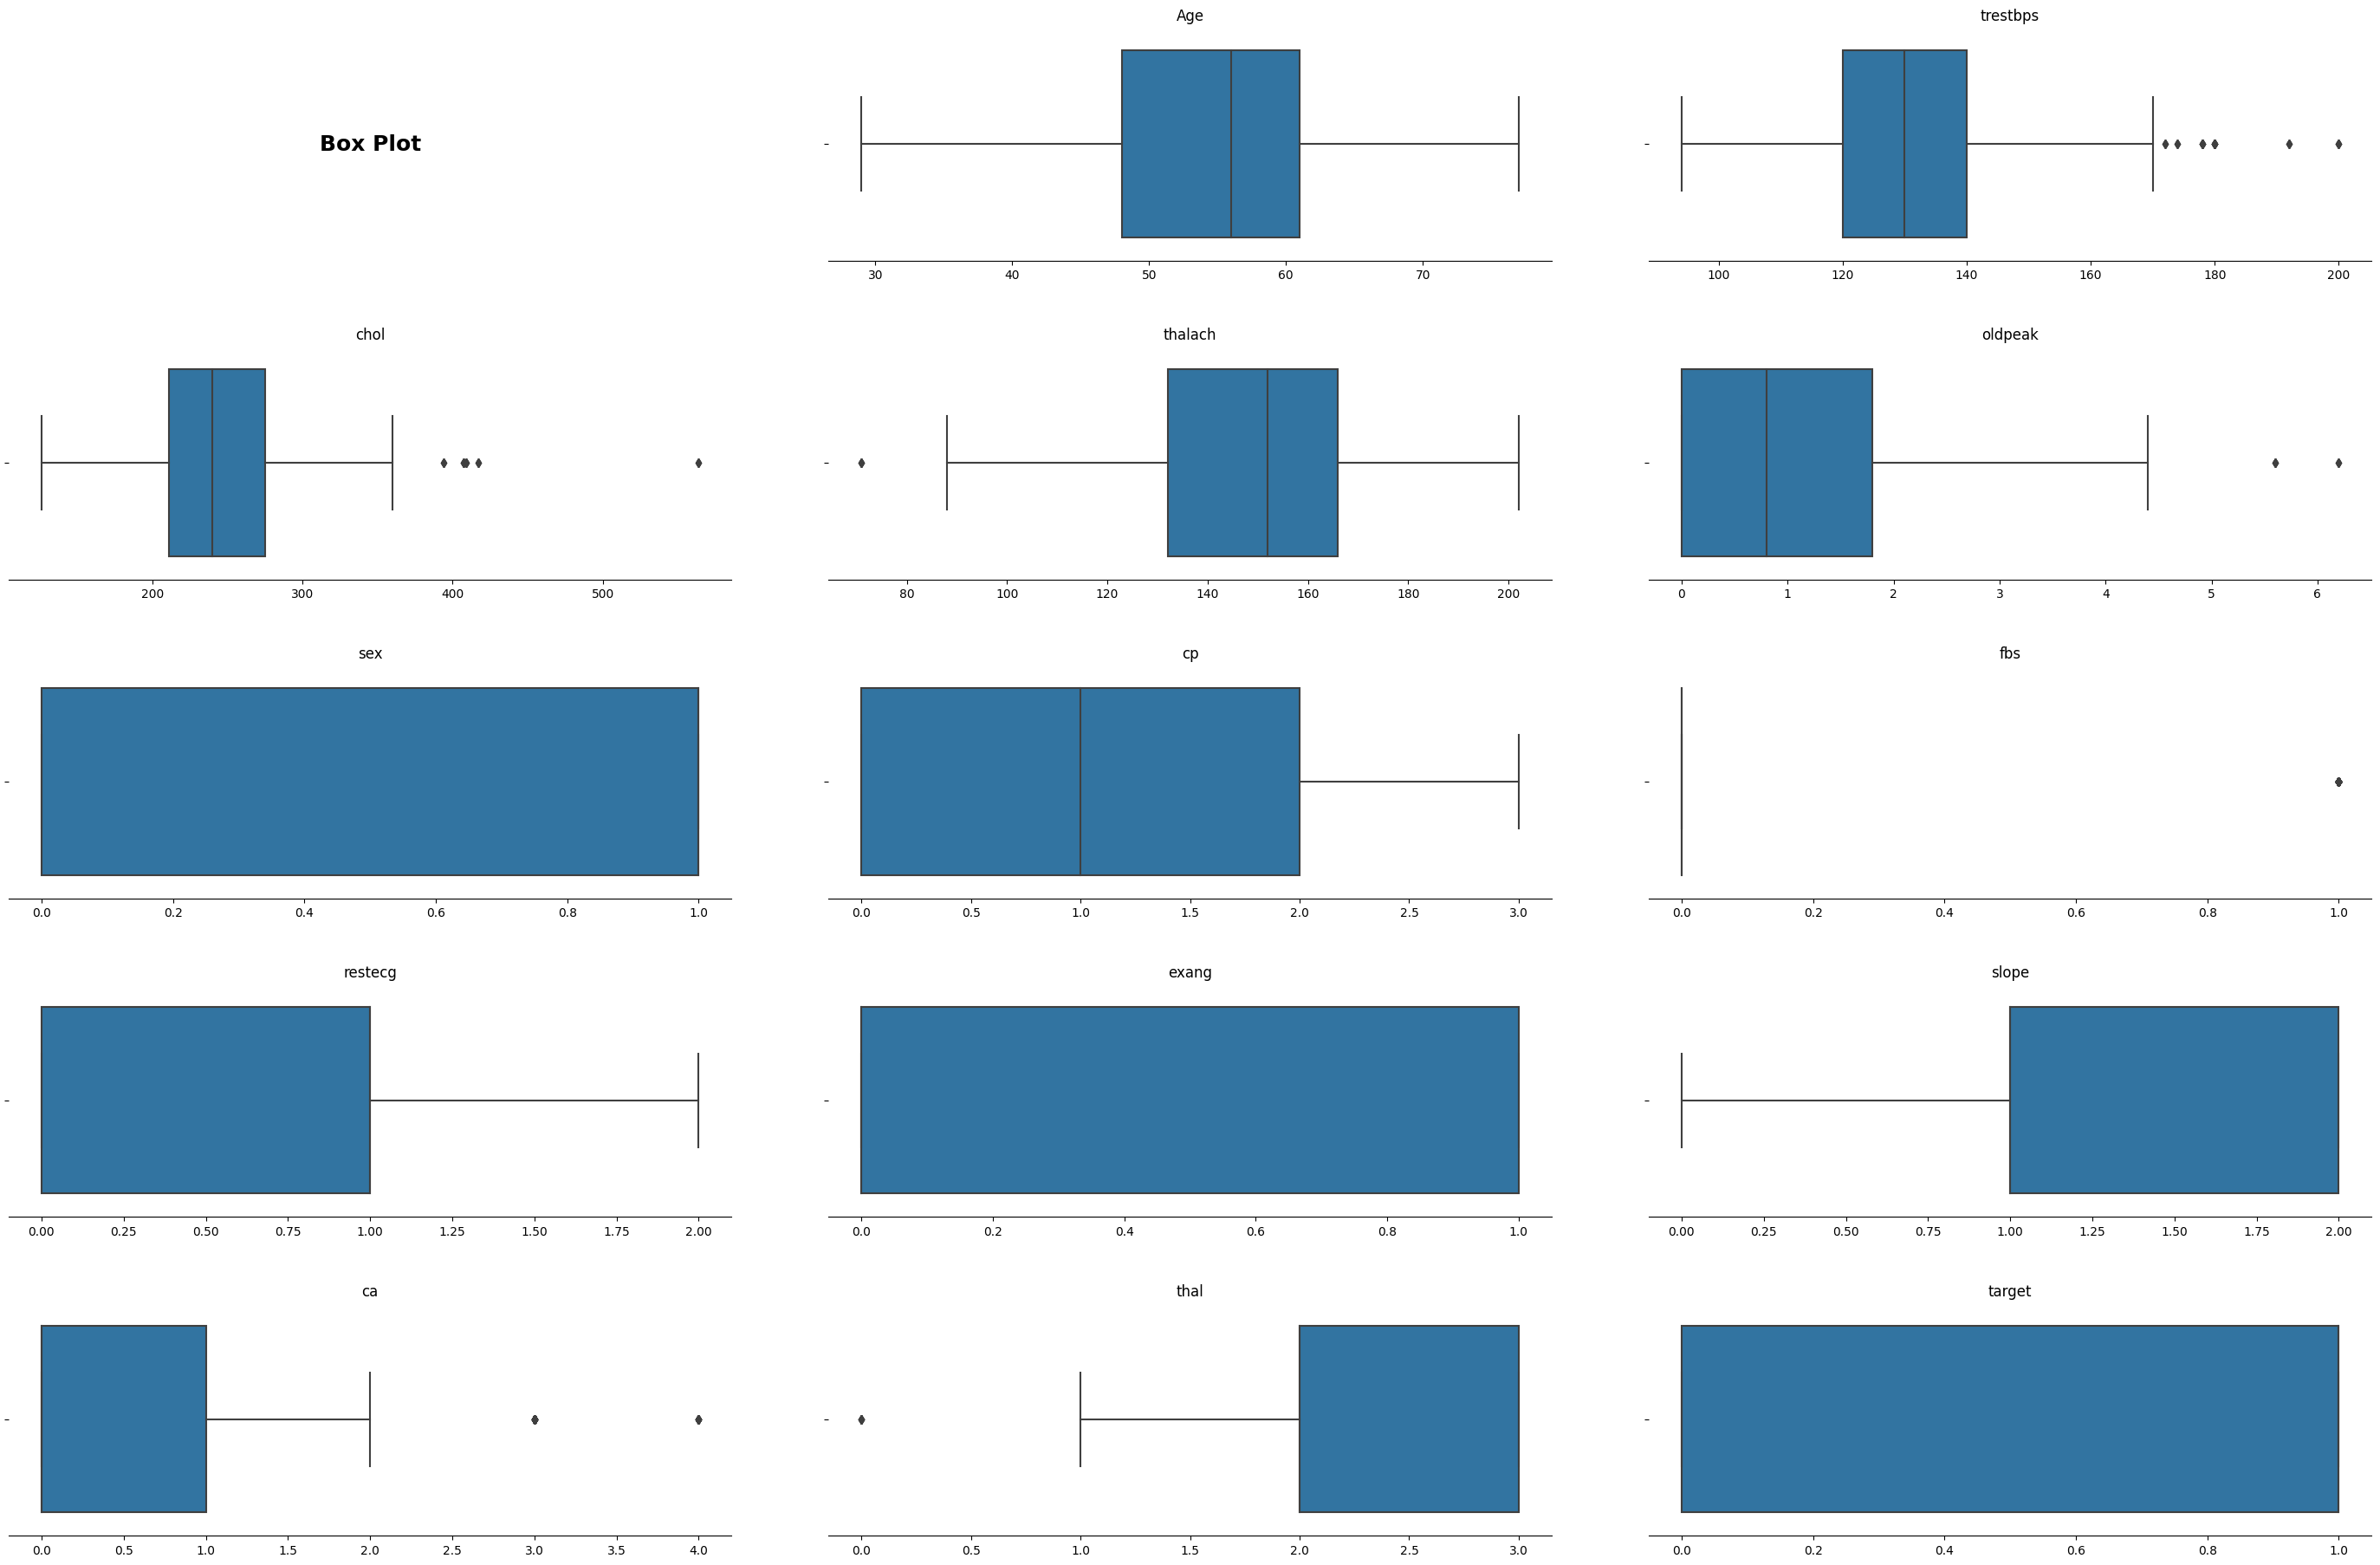

In [15]:
fig, axes = plt.subplots(5, 3, figsize=(28, 18))
fig.tight_layout(w_pad=5, h_pad=5)

titles = ['Box Plot', 'Age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

axes[0, 0].set_axis_off()
axes[0, 0].text(0.5, 0.5, titles[0], horizontalalignment='center', verticalalignment='center',
                fontsize=18, fontweight='bold', color="#000000")

for i, ax in enumerate(axes.flat[1:]):
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    sns.boxplot(ax=ax, x=df[columns[i]])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(titles[i+1])
    ax.set_xlabel("")
    ax.set_ylabel("")

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()

#### 3.2 Bivariate Analysis <a id=11></a>

##### 3.2.1 Correlation of features

This section creates a heatmap to visualize the correlation between features (columns) in the DataFrame. The code computes the correlation matrix using the corr() method on the selected columns (non_target_cols). It then uses sns.heatmap to plot the correlation matrix as a heatmap, with annotations for the correlation values.

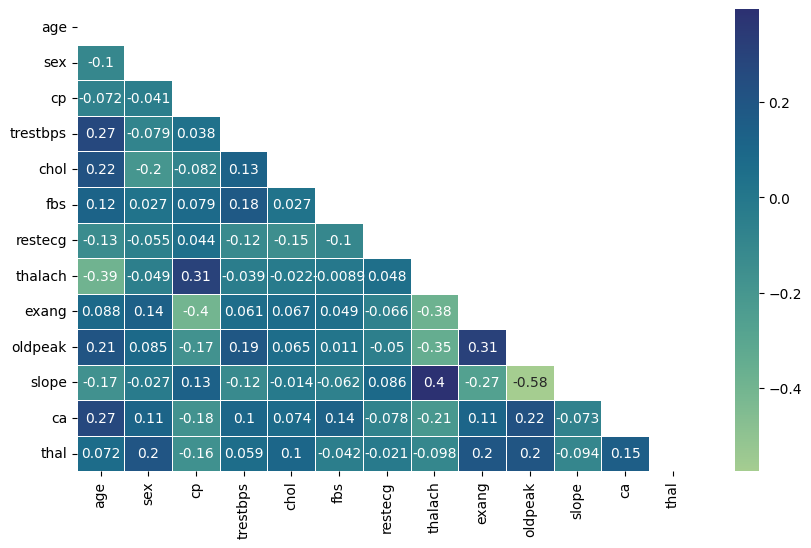

In [16]:
fig = plt.figure(figsize=(10,6))
df_corr = df[non_target_cols].corr().transpose()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr, mask=mask, cmap="crest", linewidth=.5, annot=True)
plt.show()

##### 3.2.2 Pair plot

This section creates a pair plot to visualize the pairwise relationships between variables in the DataFrame. It uses sns.pairplot to create a grid of scatter plots, with each scatter plot showing the relationship between two variables. The hue='target' parameter colors the points based on the 'target' column.

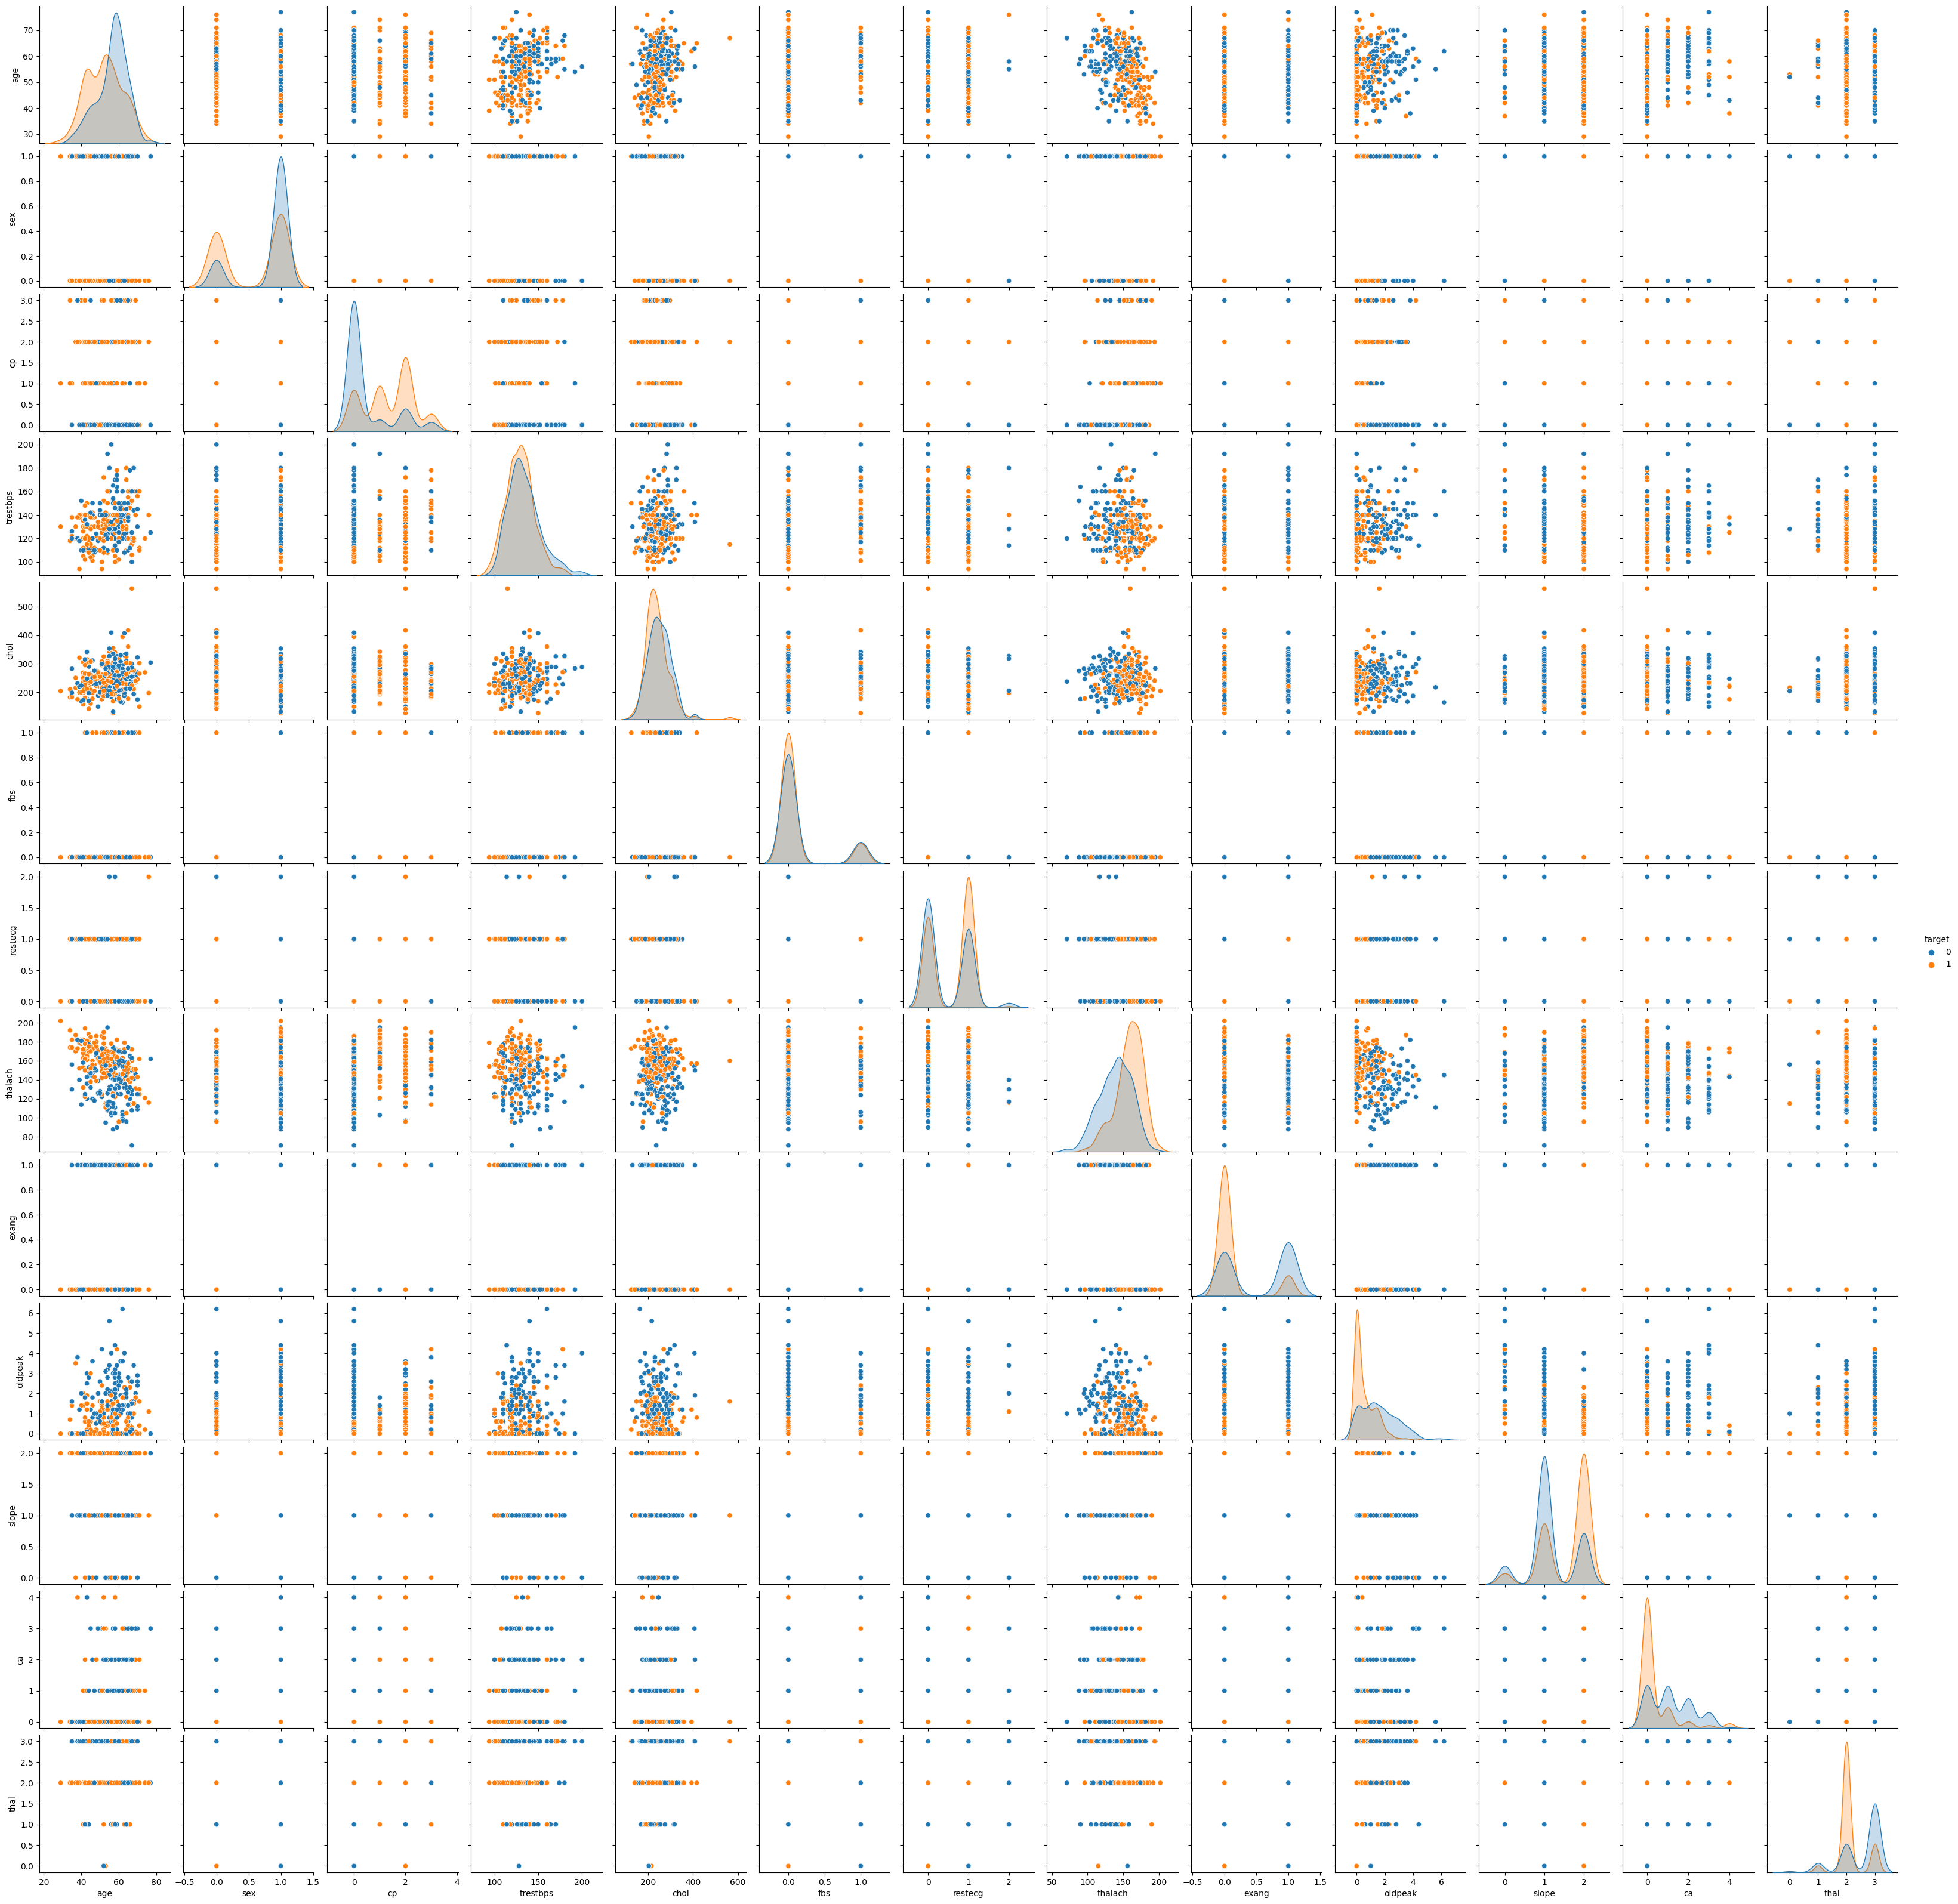

In [17]:
sns.pairplot(df, hue='target')
plt.show()

##### 3.2.3 Distribution plot

This section creates a grid of distribution plots to visualize the distribution of variables in the DataFrame. It uses sns.kdeplot to plot kernel density estimates for each variable, with different colors based on the 'target' column. The grid layout and titles are specified, and unnecessary axis spines are removed.

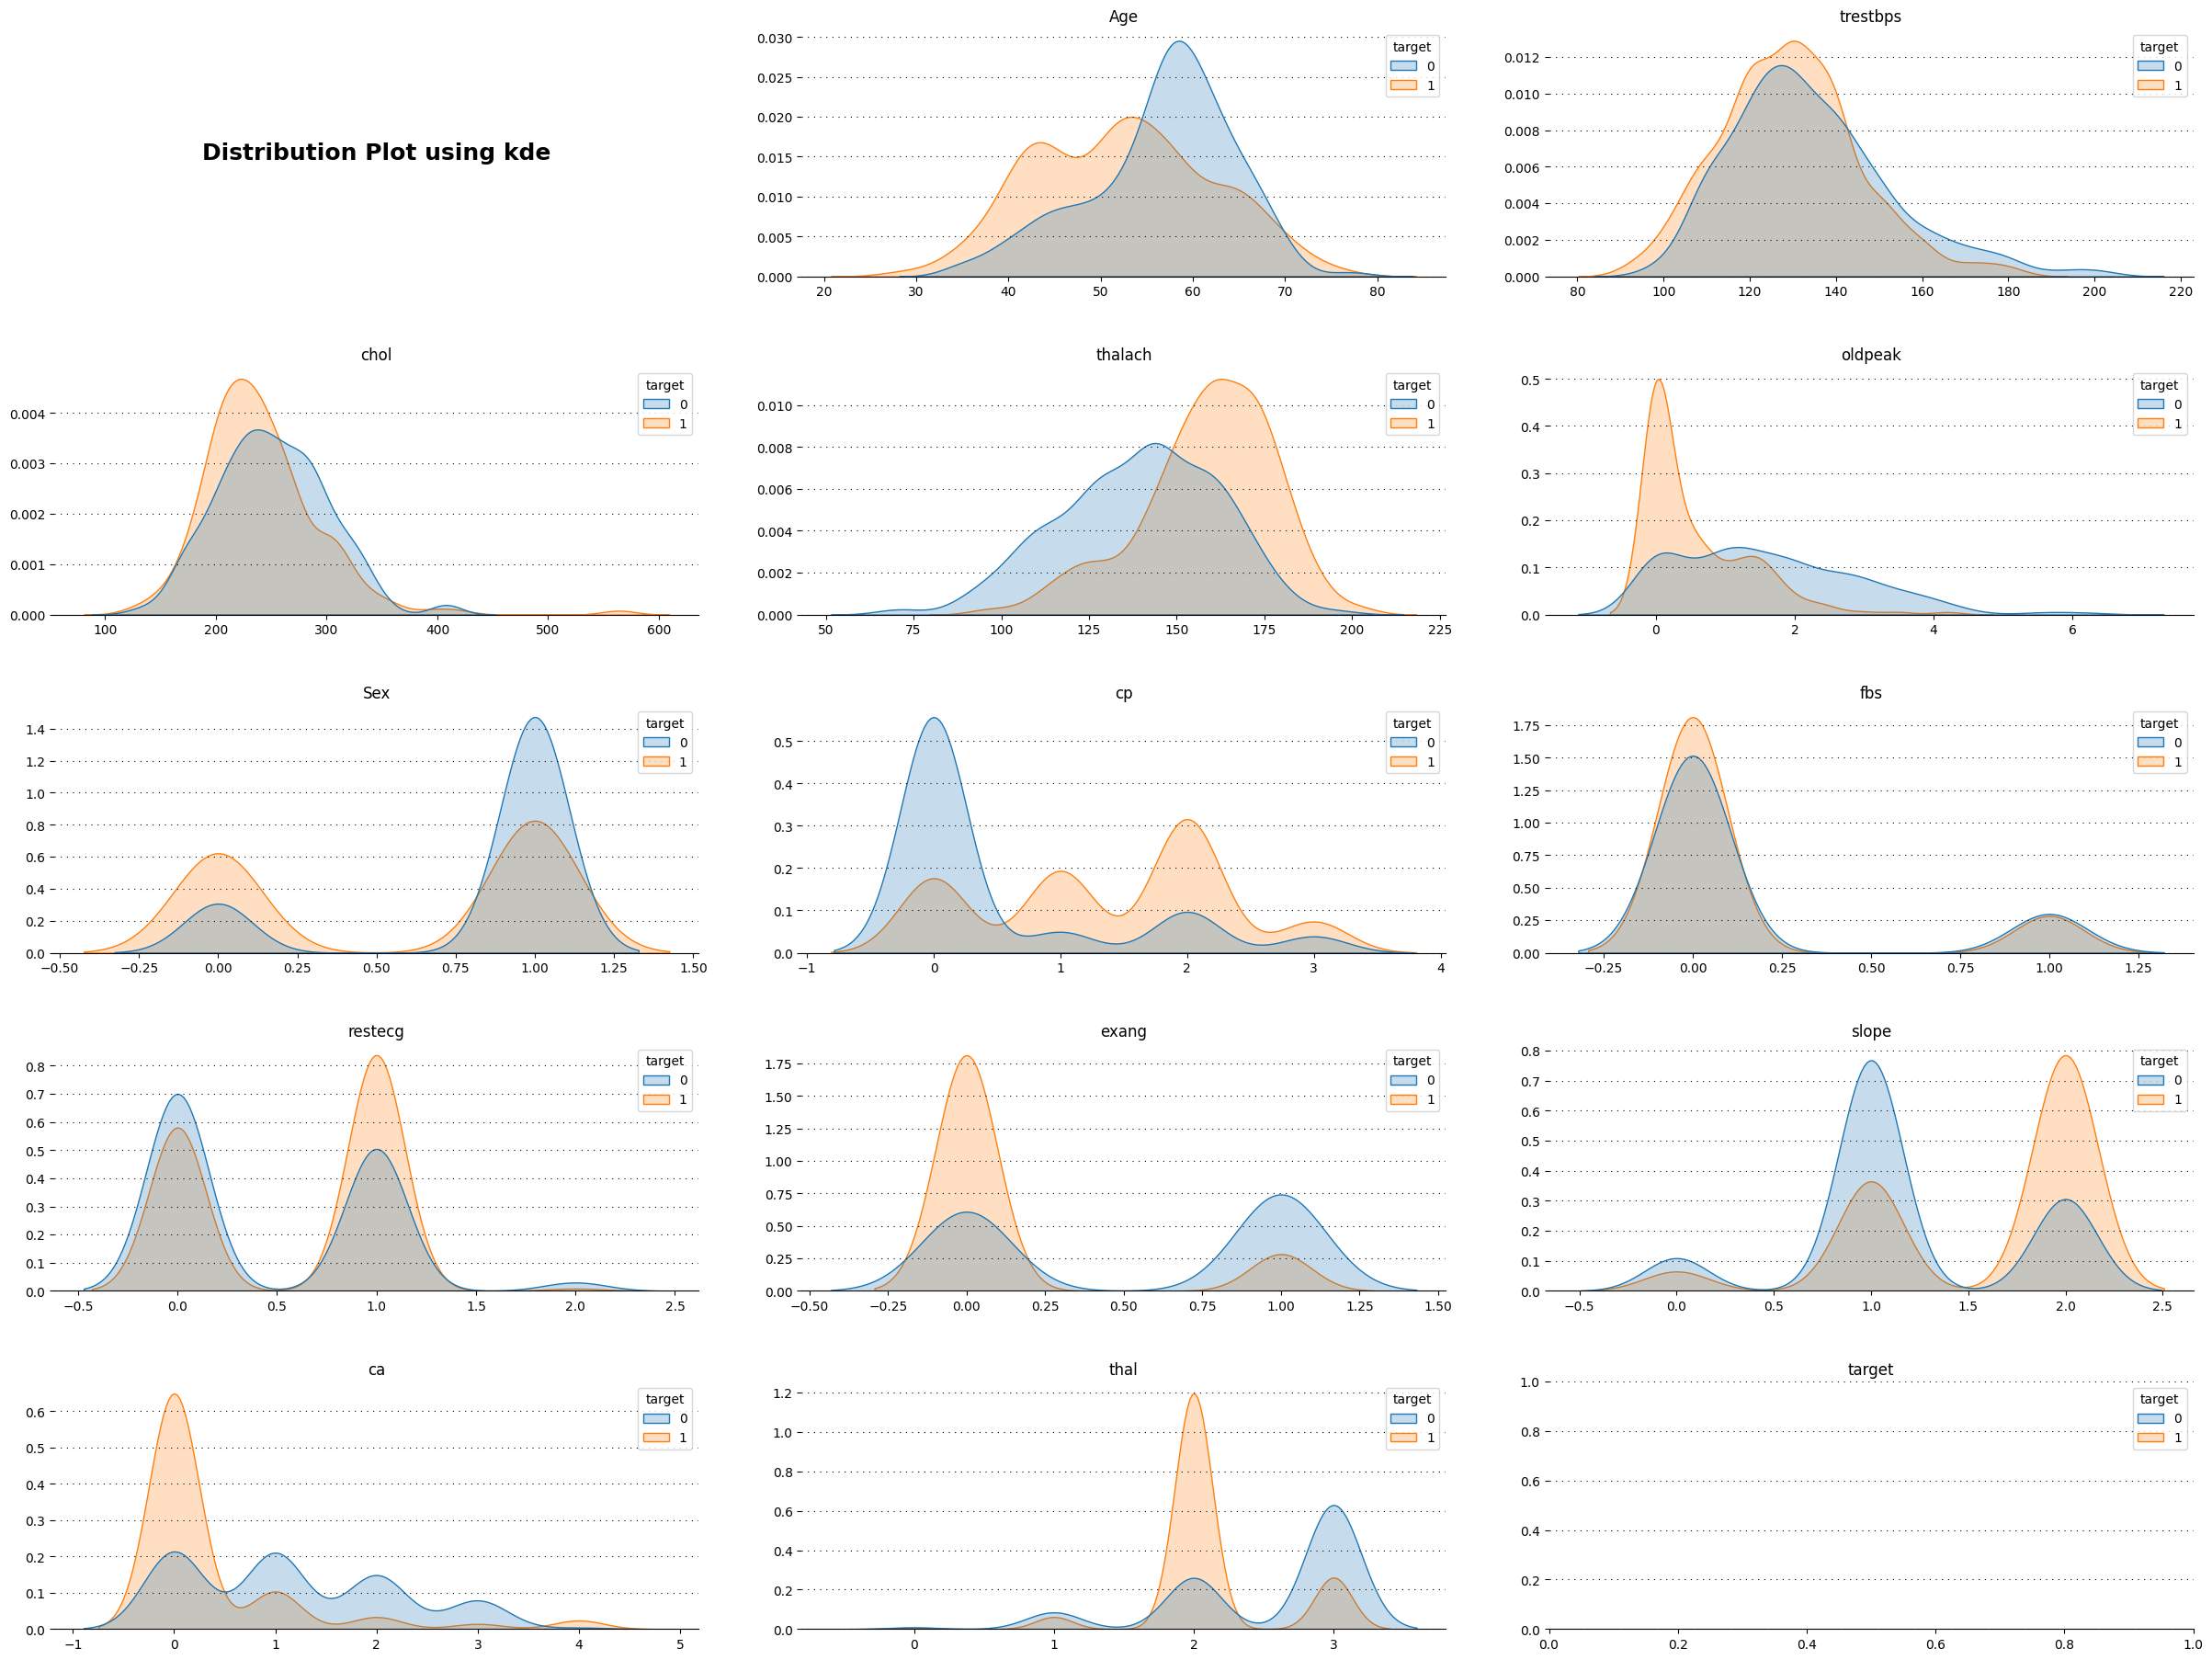

In [18]:
fig, axes = plt.subplots(5, 3, figsize=(24, 18))
fig.tight_layout(w_pad=5, h_pad=5)

titles = ['Distribution Plot using kde', 'Age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'Sex', 'cp', 'fbs',
          'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','target']

axes[0, 0].set_axis_off()
axes[0, 0].text(0.5, 0.5, titles[0], horizontalalignment='center', verticalalignment='center',
                fontsize=18, fontweight='bold', color="#000000")

for i, ax in enumerate(axes.flat[1:]):
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    sns.kdeplot(ax=ax, x=df[columns[i]], hue=df['target'], fill=True)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(titles[i+1])

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()

##### 3.2.4 Scatter plot

This section creates a grid of scatter plots to visualize the relationship between variables 'age', 'oldpeak', 'chol', and 'trestbps' with 'thalach', with different colors based on the 'target' column. Each scatter plot shows the relationship between two variables. The grid layout and titles are specified, and unnecessary axis spines are removed.

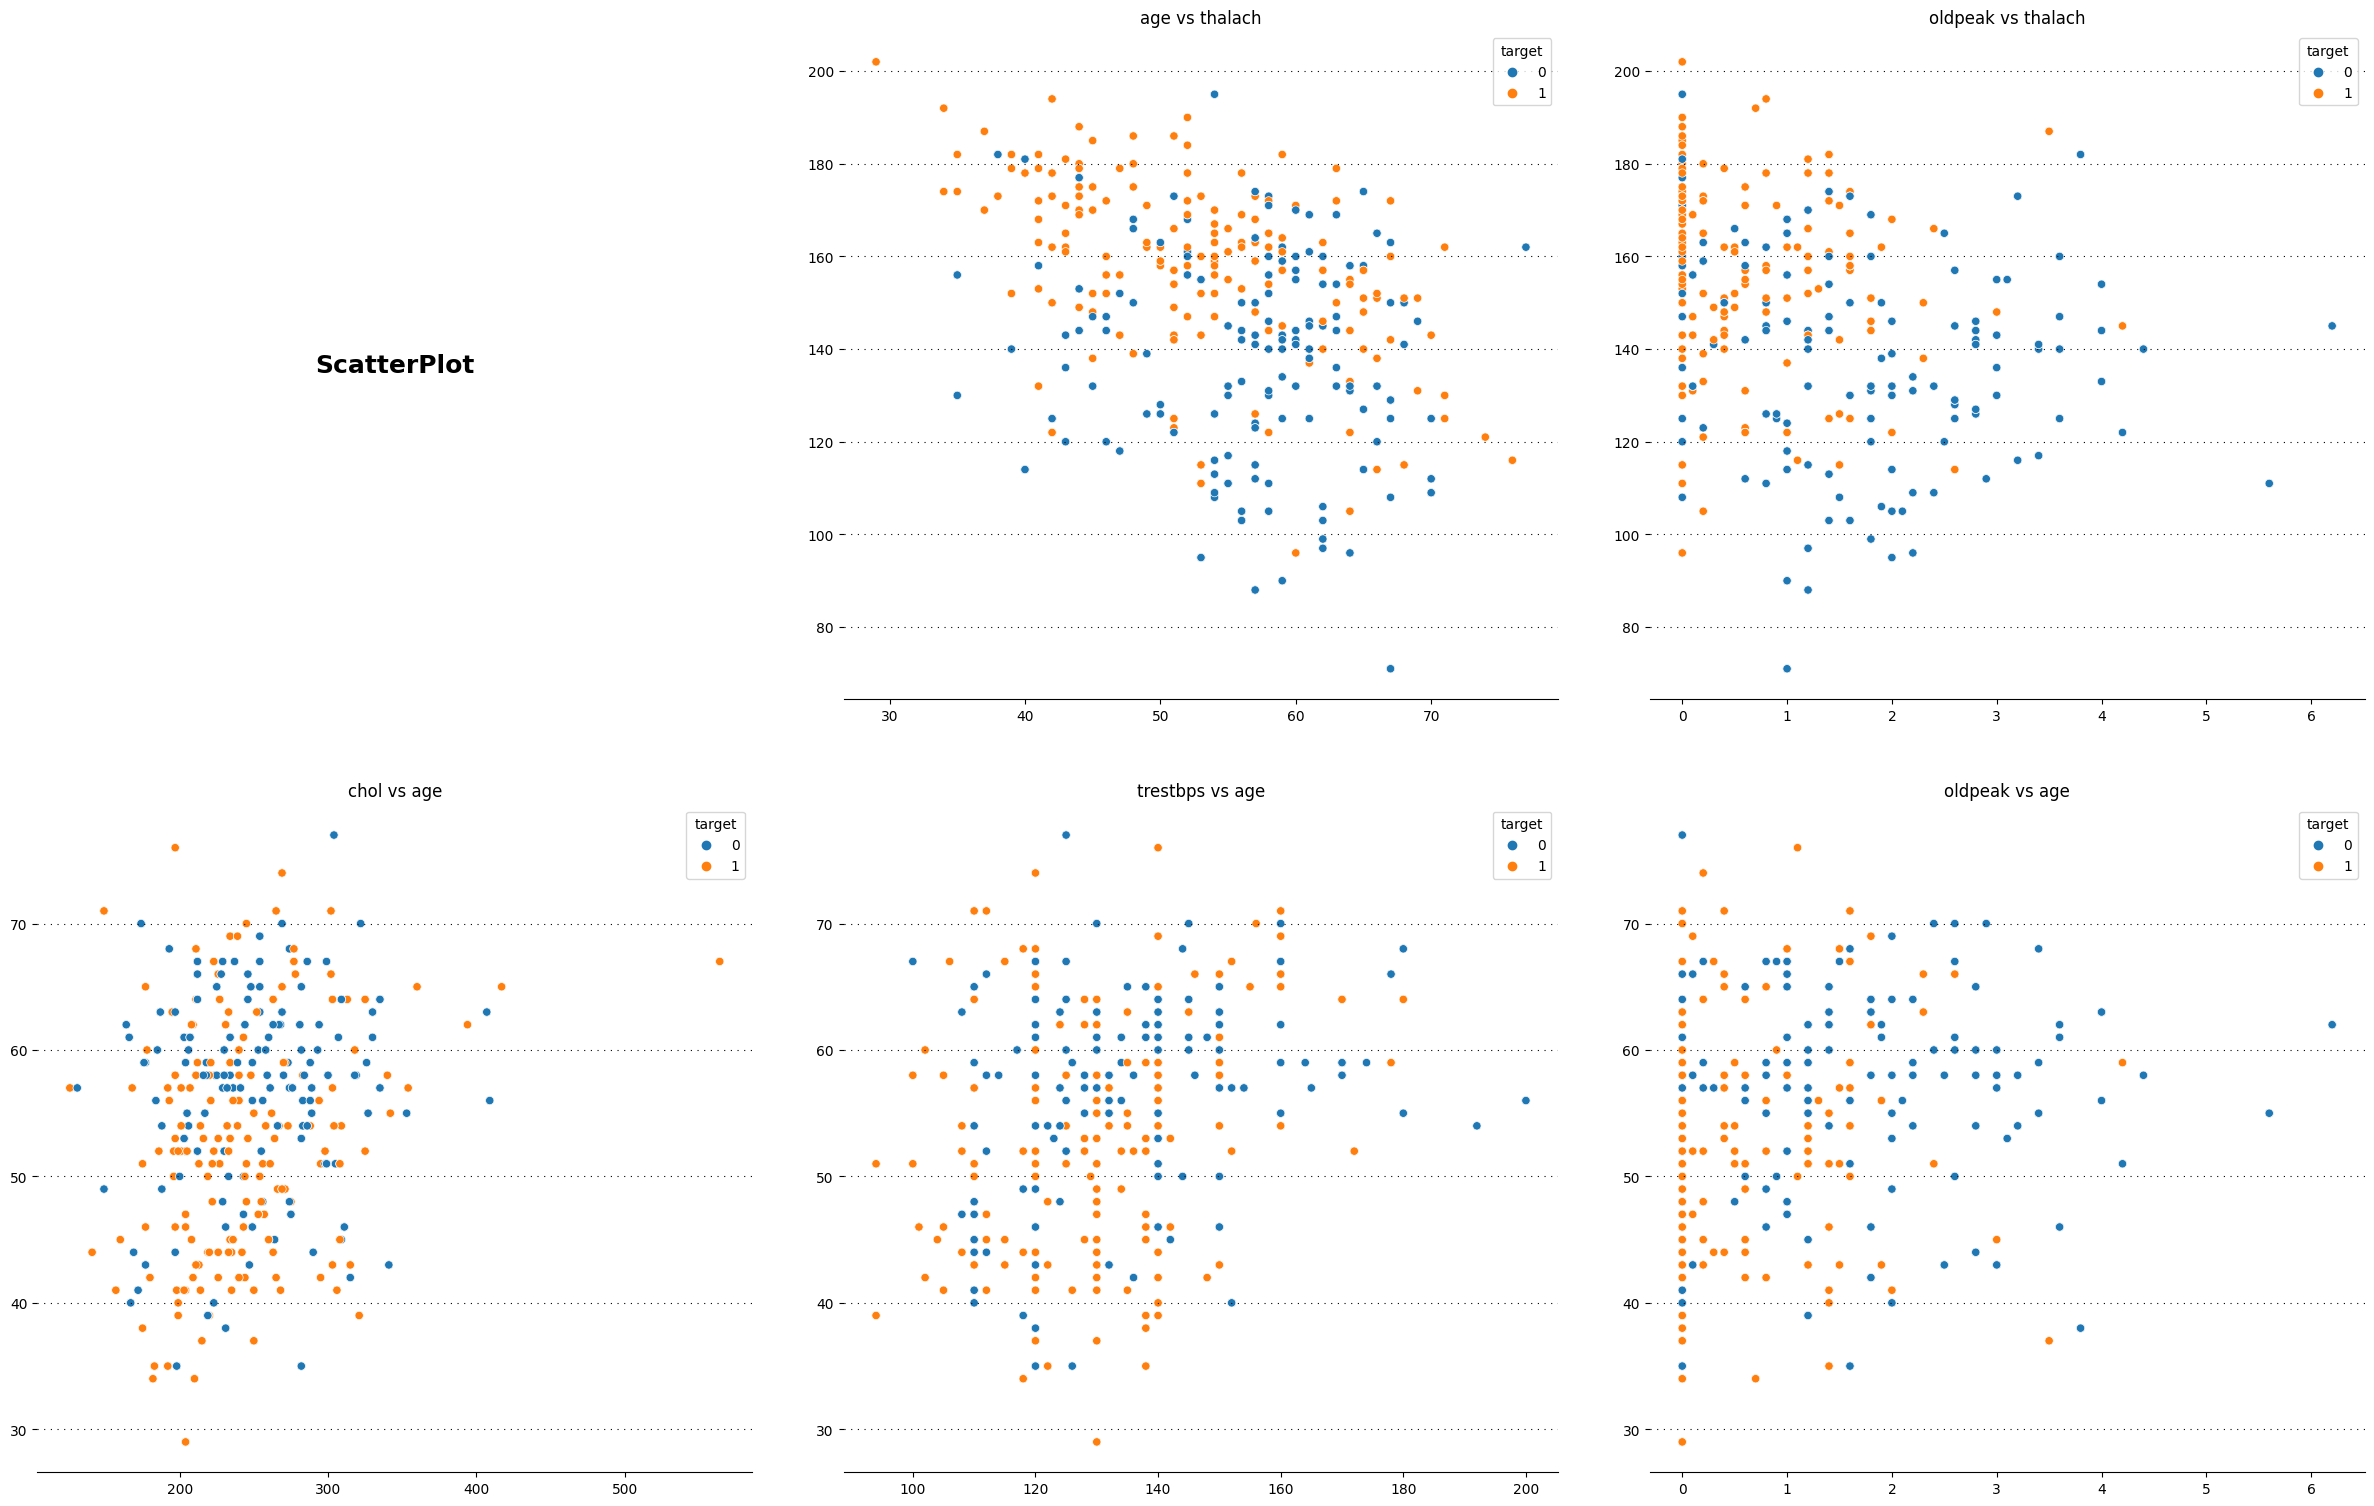

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(24, 15))
fig.tight_layout(w_pad=3.5, h_pad=5.5)

titles = ['ScatterPlot', 'age vs thalach', 'oldpeak vs thalach', 'chol vs age', 'trestbps vs age', 'oldpeak vs age']
x_columns = ['age', 'oldpeak', 'chol', 'trestbps', 'oldpeak']
y_columns = ['thalach', 'thalach', 'age', 'age', 'age']

axes[0, 0].set_axis_off()
axes[0, 0].text(0.5, 0.5, titles[0], horizontalalignment='center', verticalalignment='center',
                fontsize=18, fontweight='bold', color="#000000")

for i, ax in enumerate(axes.flat[1:]):
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
    sns.scatterplot(ax=ax, data=df, x=x_columns[i], y=y_columns[i], hue="target")
    ax.set_title(titles[i+1])
    ax.set_xlabel("")
    ax.set_ylabel("")

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

plt.show()

### 4. Data Preprocessing-1 <a id=12></a>

#### 4.1 Conclusions from EDA <a id=13></a>
1. There are no NaN values in the data.
2. They are a very less number of outliers in all features.
3. There is no apparent linear correlation between feature variable according to the heatmap.
4. The distribution curve of `oldpeak` is right skewed.
5. The distribution curve of `thalach` is left skewed
6. The plots `3.2.3` tells the following -
    - Over the `sex` range, females have high heart disease compare to males.
    - `cp` with value 2 has higher chances of Disease.
    - `oldpeak` alone isn't really an indicator of Heart Diseases.
7. Middle aged people have change of heart disease.


#### 4.2 Removing the outliers <a id=14></a>

This section aims to remove outliers from the DataFrame. The code first prints the shape of the DataFrame before removing outliers. Then, it defines an outlier range as 1.5 times the interquartile range (IQR). It uses the detect_outliers_iqr function to identify outliers based on the IQR method. The function calculates the lower and upper bounds using the quartiles and the outlier range. Finally, it filters the DataFrame to exclude rows with outliers.

In [20]:
#  the shape of df before removing the outliers
print(f'Shape of DataFrame before removing the outliers:{df.shape}')

Shape of DataFrame before removing the outliers:(1025, 14)


In [21]:
# remove outliers

# Define the outlier range as Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
outlier_range = 1.5

# Function to detect outliers using IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - outlier_range * IQR
    upper_bound = Q3 + outlier_range * IQR
    return (series < lower_bound) | (series > upper_bound)


# Filter the DataFrame to remove rows with outliers
df = df[~df[cols_with_outliers].apply(detect_outliers_iqr).any(axis=1)]

print(f'Shape of DataFrame after removing the outliers:{df.shape}')

Shape of DataFrame after removing the outliers:(769, 14)


#### 4.3 Removing the skewness <a id=15></a>

In this section, the code performs skewness correction on two columns: oldpeak and thalach. It uses lambda functions to apply transformations to the columns. For oldpeak, it takes the logarithm of the values if they are greater than 0, otherwise assigns 0. For thalach, it squares the values if they are greater than 0, otherwise assigns 0. After the transformations, it visualizes the distributions using KDE plots.

<Axes: xlabel='oldpeak', ylabel='Density'>

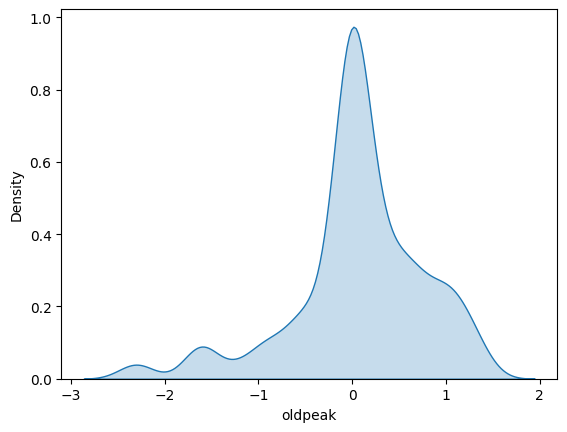

In [22]:
# removing skewness from `oldpeak`
df['oldpeak']= df['oldpeak'].map(lambda i : np.log(i) if i > 0 else 0)
sns.kdeplot(df['oldpeak'], fill=True)

<Axes: xlabel='thalach', ylabel='Density'>

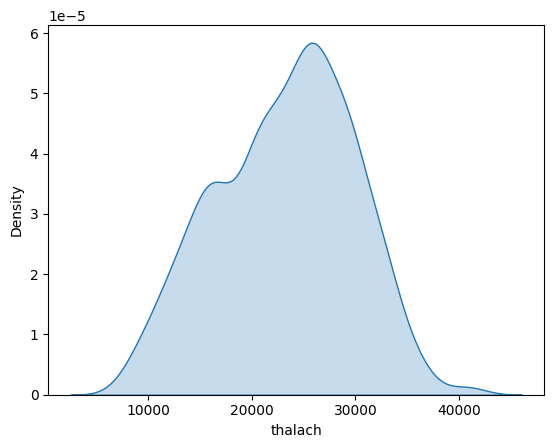

In [23]:
# removing skewness from `thalach`
df['thalach'] = df['thalach'].map(lambda i : np.square(i) if i > 0 else 0)
sns.kdeplot(df['thalach'], fill=True)

### 5. Data Preprocessing-2 (using PySpark) <a id=16></a>

This section focuses on data preprocessing using PySpark.

#### 5.1 Creating the spark session and context <a id=17></a>

The code creates a SparkContext (sc) and a SparkSession (spark). It sets the application name as "heart-disease" and configures some Spark options.



In [24]:
# Creating a spark context class
sc = SparkContext()

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("heart-disease") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [25]:
print(spark)

#### 5.2 Loading data into a Spark DataFrame <a id=18></a>

This step involves converting the columns of the Spark DataFrame into a single feature vector. The VectorAssembler class is used to assemble the input columns (non_target_cols) into an output column named 'features'. The output is stored in the output DataFrame.

In [26]:
# We use the `createDataFrame` function to load the data into a spark dataframe
sdf = spark.createDataFrame(df)

# Let us look at the schema of the loaded spark dataframe
sdf.printSchema()

root
 |-- age: long (nullable = true)
 |-- sex: long (nullable = true)
 |-- cp: long (nullable = true)
 |-- trestbps: long (nullable = true)
 |-- chol: long (nullable = true)
 |-- fbs: long (nullable = true)
 |-- restecg: long (nullable = true)
 |-- thalach: long (nullable = true)
 |-- exang: long (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: long (nullable = true)
 |-- ca: long (nullable = true)
 |-- thal: long (nullable = true)
 |-- target: long (nullable = true)



#### 5.3 Converting data frame columns into feature vectors <a id=19></a>

This step involves converting the columns of the Spark DataFrame into a single feature vector. The VectorAssembler class is used to assemble the input columns (non_target_cols) into an output column named 'features'. The output is stored in the output DataFrame.

In [27]:
assembler = VectorAssembler(
    inputCols=non_target_cols,
    outputCol='features')

output = assembler.transform(sdf)

#### 5.4 Creating a test-train split of 75%-25% <a id=20></a>

The code splits the data into training and testing datasets using a 75% - 25% split ratio. It assigns 75% of the data to the train DataFrame and 25% to the test DataFrame.

In [28]:
train, test = output.randomSplit([0.75, 0.25])

#### 5.5 Standard Scaling <a id=21></a>

This step performs standard scaling on the feature vectors in both the training and testing datasets. The StandardScaler class is used to scale the 'features' column, and the resulting scaled features are stored in the features_scaled column. The scaling is applied separately to the training and testing datasets.

In [29]:
standard_scaler = StandardScaler(inputCol="features", outputCol="features_scaled")
train_model = standard_scaler.fit(train)
train_scaled = train_model.transform(train)
train_scaled.show(5, truncate=False)

+---+---+---+--------+----+---+-------+-------+-----+------------------+-----+---+----+------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|age|sex|cp |trestbps|chol|fbs|restecg|thalach|exang|oldpeak           |slope|ca |thal|target|features                                                                     |features_scaled                                                                                                                                                          |
+---+---+---+--------+----+---+-------+-------+-----+------------------+-----+---+----+------+-----------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
test_scaled = train_model.transform(test)
test_scaled.show(5, truncate=False)

+---+---+---+--------+----+---+-------+-------+-----+--------------------+-----+---+----+------+-------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|age|sex|cp |trestbps|chol|fbs|restecg|thalach|exang|oldpeak             |slope|ca |thal|target|features                                                                       |features_scaled                                                                                                                                                                            |
+---+---+---+--------+----+---+-------+-------+-----+--------------------+-----+---+----+------+-------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------

### 6. Building and Training a Linear Regression Model <a id=22></a>

#### 6.1 Create and Train model <a id=23></a>

In this section, a Logistic Regression (LR) model is created and trained. The LogisticRegression class is used to define the LR model. It takes the scaled features column (features_scaled) as input and the target column (target) as the label column. The maxIter parameter is set to 100, indicating the maximum number of iterations for model training.

The LR model is trained using the fit method, which takes the train_scaled DataFrame as input. The trained model is stored in the lrModel variable.

After training, the code retrieves the model summary (trainingSummary) from the trained LR model.

In [31]:
# Create a LR model
lr = LogisticRegression(featuresCol='features_scaled', labelCol='target', maxIter=100)

# Fit the model
lrModel = lr.fit(train_scaled)


# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
trainingSummary

#### 6.2 Predict on new data <a id=24></a>

In this section, the trained model is used to make predictions on the test dataset (test_scaled). The transform method is applied to the test_scaled DataFrame, and the predictions are stored in the pred DataFrame.

The toPandas() method is used to convert the pred DataFrame to a Pandas DataFrame for easier visualization. The head(5) method is then called to display the first 5 rows of the predicted DataFrame.

In [32]:
pred = lrModel.transform(test_scaled)
pred.toPandas().head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,features,features_scaled,rawPrediction,probability,prediction
0,34,0,1,118,210,0,1,36864,0,-0.356675,2,0,2,1,"[34.0, 0.0, 1.0, 118.0, 210.0, 0.0, 1.0, 36864...","[3.6616241905824527, 0.0, 0.9969849177604677, ...","[-5.900169043726977, 5.900169043726977]","[0.0027315002425705765, 0.9972684997574294]",1.0
1,34,0,1,118,210,0,1,36864,0,-0.356675,2,0,2,1,"[34.0, 0.0, 1.0, 118.0, 210.0, 0.0, 1.0, 36864...","[3.6616241905824527, 0.0, 0.9969849177604677, ...","[-5.900169043726977, 5.900169043726977]","[0.0027315002425705765, 0.9972684997574294]",1.0
2,34,1,3,118,182,0,0,30276,0,0.000000,2,0,2,1,"[34.0, 1.0, 3.0, 118.0, 182.0, 0.0, 0.0, 30276...","[3.6616241905824527, 2.1400981239232886, 2.990...","[-4.829478266649296, 4.829478266649296]","[0.007927344243698611, 0.9920726557563014]",1.0
3,39,0,2,94,199,0,1,32041,0,0.000000,2,0,2,1,"[39.0, 0.0, 2.0, 94.0, 199.0, 0.0, 1.0, 32041....","[4.200098336256342, 0.0, 1.9939698355209354, 6...","[-6.933588500821157, 6.933588500821157]","[0.0009735488799265492, 0.9990264511200735]",1.0
4,40,1,0,152,223,0,1,32761,0,0.000000,2,0,3,0,"[40.0, 1.0, 0.0, 152.0, 223.0, 0.0, 1.0, 32761...","[4.307793165391121, 2.1400981239232886, 0.0, 1...","[0.24800809430694581, -0.24800809430694581]","[0.5616861644392289, 0.4383138355607711]",0.0


#### 6.3 Model Evaluation <a id=25></a>

In this section, the code evaluates the performance of the LR model. It calculates the accuracy of the predictions by comparing the target column with the prediction column in the pred DataFrame. The filter method is used to select the rows where the target and prediction values match. The count method is used to count the number of matching rows, and it is divided by the total number of rows in the pred DataFrame to compute the accuracy.

In [33]:
accuracy = pred.filter(pred.target == pred.prediction).count() / float(pred.count())
print("Accuracy : ",accuracy)

Accuracy :  0.8465346534653465
